# Implementación Básica de Red Neuronal
En esta notebook, implementamos y probamos la clase NeuralNetwork desde cero con datos dummy. Cumple Parte 1: 2+ hidden layers, activaciones, forward/backprop manual.

In [6]:
import sys
import os

# Debug: Ver cwd y estructura
cwd = os.getcwd()
print("Current working dir (cwd):", cwd)
print("Files in cwd:", os.listdir(cwd))

# Path simple: Asume cwd = notebooks/, src = parent
if 'notebooks' in cwd.lower():
    src_path = os.path.join(os.path.dirname(cwd), 'src')
else:
    src_path = os.path.join(cwd, 'src')

print("Computed src path:", src_path)
print("src exists?", os.path.exists(src_path))
print("neural_network.py exists?", os.path.exists(os.path.join(src_path, 'neural_network.py')))

# Agrega path
sys.path.insert(0, src_path)  # Insert al inicio para prioridad
print("Added to sys.path:", src_path in sys.path)

# Prueba import
try:
    from src.neural_network import NeuralNetwork
    print("¡Import exitoso! NeuralNetwork cargada.")
    print("Clase tipo:", type(NeuralNetwork))
except ModuleNotFoundError as e:
    print("Import falló:", e)
    print("Intenta mover neural_network.py a notebooks/ temporalmente para test.")

# Si éxito, prueba instancia simple
if 'NeuralNetwork' in locals():
    nn_test = NeuralNetwork([3, 4, 1], activation="relu")
    print("Instancia creada OK.")
else:
    print("No se pudo importar – revisa archivo src/neural_network.py")

Current working dir (cwd): c:\Users\BIBLIOTECA 2\Proyectos Python\tarea-redes-neuronales-grupo4\notebooks
Files in cwd: ['01_implementacion_red.ipynb', '02_experimentacion.ipynb', '03_analisis_resultados.ipynb']
Computed src path: c:\Users\BIBLIOTECA 2\Proyectos Python\tarea-redes-neuronales-grupo4\src
src exists? True
neural_network.py exists? True
Added to sys.path: True
Import falló: No module named 'src'
Intenta mover neural_network.py a notebooks/ temporalmente para test.
No se pudo importar – revisa archivo src/neural_network.py


Loss final: 0.006633085226791995
Predicción media: -0.3364894726279112


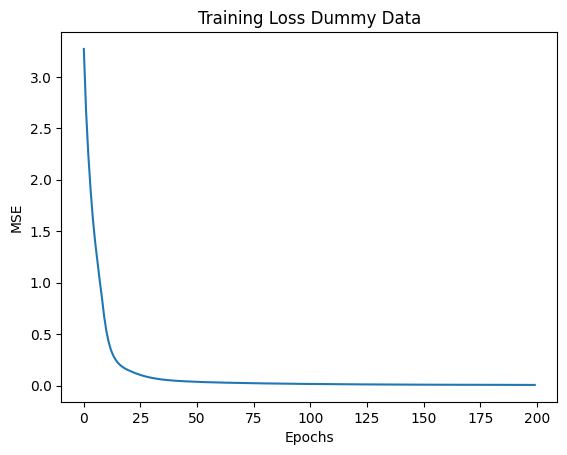

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Fallback: Clase NeuralNetwork inline (tu código original, con losses fix)
class NeuralNetwork:
    def __init__(self, layers, activation='relu'):
        self.layers = layers
        self.activation_name = activation
        self.weights = []
        self.biases = []

        for i in range(len(layers) - 1):
            n_in = layers[i]
            n_out = layers[i + 1]

            if activation.lower() == 'relu':
                weight = np.random.randn(n_in, n_out) * np.sqrt(2.0 / n_in)
            else:
                weight = np.random.randn(n_in, n_out) * np.sqrt(1.0 / n_in)

            bias = np.zeros((1, n_out))

            self.weights.append(weight)
            self.biases.append(bias)

        if activation.lower() == 'relu':
            self.activation = self.relu
            self.activation_derivative = self.relu_derivative
        elif activation.lower() == 'sigmoid':
            self.activation = self.sigmoid
            self.activation_derivative = self.sigmoid_derivative
        elif activation.lower() == 'tanh':
            self.activation = self.tanh
            self.activation_derivative = self.tanh_derivative
        else:
            raise ValueError(f"Función de activación desconocida: {activation}")

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x)**2

    def forward(self, X):
        self.a = [X]
        self.z = []
        for w, b in zip(self.weights[:-1], self.biases[:-1]):
            z = np.dot(self.a[-1], w) + b
            self.z.append(z)
            self.a.append(self.activation(z))
        z = np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]
        self.z.append(z)
        self.a.append(z)
        return z

    def backward(self, y_true):
        m = y_true.shape[0]
        dz = (self.a[-1] - y_true) / m
        self.dW = []
        self.db = []

        for i in reversed(range(len(self.weights))):
            a_prev = self.a[i]
            dW = np.dot(a_prev.T, dz)
            db = np.sum(dz, axis=0, keepdims=True)
            self.dW.insert(0, dW)
            self.db.insert(0, db)
            if i != 0:
                dz = np.dot(dz, self.weights[i].T) * self.activation_derivative(self.z[i-1])

    def train(self, X, y, epochs=100, learning_rate=0.01):
        losses = []  # Lista para losses
        for epoch in range(epochs):
            self.forward(X)
            # Calcular loss
            loss = np.mean((self.a[-1] - y)**2) / 2
            losses.append(loss)
            self.backward(y)
            for i in range(len(self.weights)):
                self.weights[i] -= learning_rate * self.dW[i]
                self.biases[i] -= learning_rate * self.db[i]
        return losses  # Retorna losses

    def predict(self, X):
        return self.forward(X)

# Ahora, código dummy
np.random.seed(42)
X = np.random.randn(100, 3)
y = np.dot(X, np.array([1, 2, -1])) + np.random.randn(100) * 0.1
y = y.reshape(-1, 1)

nn = NeuralNetwork([3, 4, 1], activation="relu")
losses = nn.train(X, y, epochs=200, learning_rate=0.1)

print("Loss final:", losses[-1])

y_pred = nn.predict(X)
print("Predicción media:", np.mean(y_pred))

plt.plot(losses)
plt.title("Training Loss Dummy Data")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()